# Bitcoin prediction using least squares for non-linear model

This notebook we'll be using the bitcoin price and we'll be performing a prediction using a model to determine the future daily price a week ahead, comparing with the actual values.

### Least Squares Fitting

If the number of points is larger than the degree of polynomial that you want to use, then
the linear system for determining the coefficients will be over-determined (more rows than
columns).To find the least-squares polynomial of a given degree, you carry out the same
Here are some examples of what the linear system will look likeprocess as interpolation, but the resulting polynomial will not interpolate the data, it will just be “close”.


Here are some examples of what the linear system will look like for determining the least-squares polynomial coefficients:

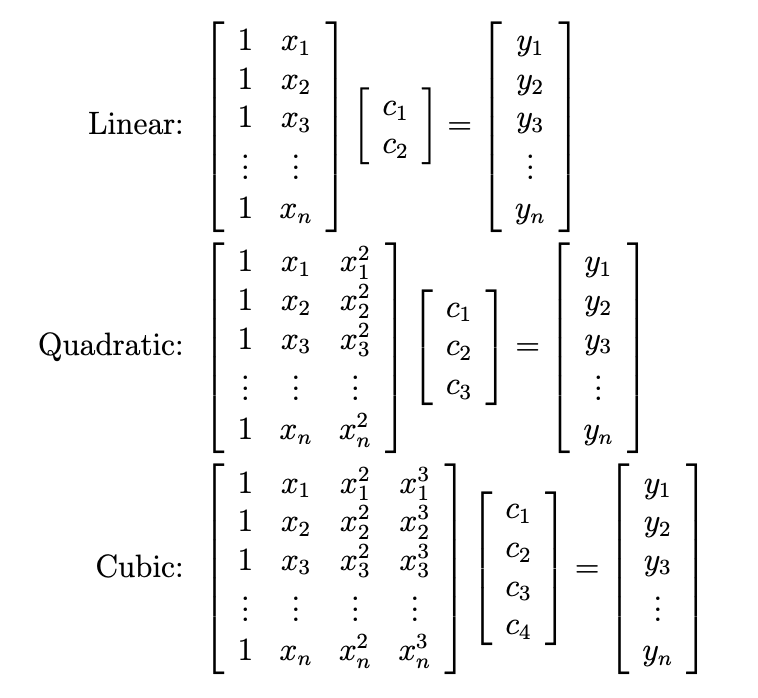


Now, reading the bitcoin data from: https://www.investing.com/crypto/bitcoin/historical-data


In [8]:
using CSV
using DataFrames

DataB = CSV.read("/Users/paolagallegospinto/Desktop/Universidad/Intro Optimizacion/Homework 1/Data/Bitcoin.csv",DataFrame)


,Date,Price,Open,High,Low,Vol.,Change %
,String15,String15,String15,String15,String15,String7,String7
1,Mar 21 2022,"41,323.0","41,282.0","41,482.0","40,530.0",381.29M,0.11%
2,Mar 20 2022,"41,276.0","42,241.0","42,301.0","40,922.0",308.45M,-2.27%
3,Mar 19 2022,"42,233.0","41,768.0","42,386.0","41,529.6",224.59M,1.11%
4,Mar 18 2022,"41,767.8","40,914.6","42,308.4","40,234.8",2.31B,2.08%
5,Mar 17 2022,"40,914.8","41,118.7","41,406.0","40,557.8",1.90B,-0.50%
6,Mar 16 2022,"41,118.7","39,282.5","41,701.6","38,953.2",4.47B,4.67%
7,Mar 15 2022,"39,285.7","39,673.0","39,854.7","38,220.9",2.25B,-0.97%
8,Mar 14 2022,"39,671.1","37,789.5","39,914.3","37,613.6",2.33B,4.97%
9,Mar 13 2022,"37,792.4","38,813.2","39,272.3","37,603.4",1.55B,-2.63%


In [9]:
DataB.Price .= replace.(DataB.Price, "," => "")
DataB.PriceFloat = parse.(Float64, DataB.Price)

29-element Vector{Float64}:
 41323.0
 41276.0
 42233.0
 41767.8
 40914.8
 41118.7
 39285.7
 39671.1
 37792.4
 38814.3
 38730.2
 39416.3
 41929.0
     ⋮
 39142.7
 42463.0
 43912.8
 44420.3
 43188.2
 37689.1
 39115.5
 39209.6
 38339.2
 37224.6
 38248.2
 37017.7

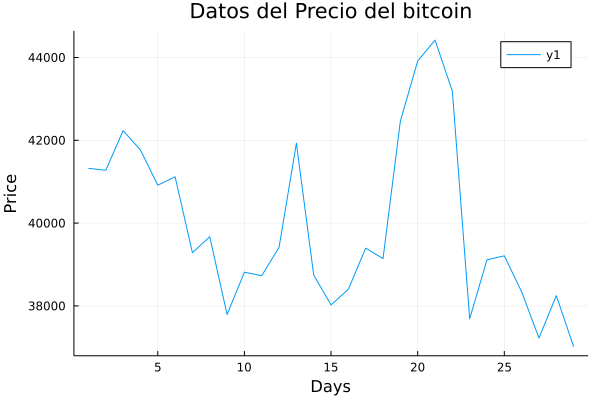

In [10]:
using Plots

plot(DataB.PriceFloat, title = "Datos del Precio del bitcoin",xlabel = "Days",ylabel = "Price")


Creating the matrix $A$ for the linear system determining the least-squares polynomial coefficients

In [11]:
N = size(DataB.PriceFloat,1);
A = Array((1:N));
b = Array(DataB.PriceFloat);
A = [ones(N,1) A A.^2 A.^3 A.^4 A.^5 A.^6];#Polynomial degree 6
println(A)
println(b)

[1.0 1.0 1.0 1.0 1.0 1.0 1.0; 1.0 2.0 4.0 8.0 16.0 32.0 64.0; 1.0 3.0 9.0 27.0 81.0 243.0 729.0; 1.0 4.0 16.0 64.0 256.0 1024.0 4096.0; 1.0 5.0 25.0 125.0 625.0 3125.0 15625.0; 1.0 6.0 36.0 216.0 1296.0 7776.0 46656.0; 1.0 7.0 49.0 343.0 2401.0 16807.0 117649.0; 1.0 8.0 64.0 512.0 4096.0 32768.0 262144.0; 1.0 9.0 81.0 729.0 6561.0 59049.0 531441.0; 1.0 10.0 100.0 1000.0 10000.0 100000.0 1.0e6; 1.0 11.0 121.0 1331.0 14641.0 161051.0 1.771561e6; 1.0 12.0 144.0 1728.0 20736.0 248832.0 2.985984e6; 1.0 13.0 169.0 2197.0 28561.0 371293.0 4.826809e6; 1.0 14.0 196.0 2744.0 38416.0 537824.0 7.529536e6; 1.0 15.0 225.0 3375.0 50625.0 759375.0 1.1390625e7; 1.0 16.0 256.0 4096.0 65536.0 1.048576e6 1.6777216e7; 1.0 17.0 289.0 4913.0 83521.0 1.419857e6 2.4137569e7; 1.0 18.0 324.0 5832.0 104976.0 1.889568e6 3.4012224e7; 1.0 19.0 361.0 6859.0 130321.0 2.476099e6 4.7045881e7; 1.0 20.0 400.0 8000.0 160000.0 3.2e6 6.4e7; 1.0 21.0 441.0 9261.0 194481.0 4.084101e6 8.5766121e7; 1.0 22.0 484.0 10648.0 234256.

Using the QR solution:

In [12]:
using LinearAlgebra
xhat3 = A\b

7-element Vector{Float64}:
 40993.59042324876
   424.50573805383283
   -21.647179129032175
   -23.512953937556276
     3.0009049491115687
    -0.12548673036274055
     0.0017273327401757183

Finally, view the results of the labor by plotting the resulting polynomial getting closer to Bitcoin price plot which best fitted.

[41375.813173787494, 41612.0190044494, 41651.27251990242, 41487.23786738085, 41146.22952797399, 40676.506787488004, 40138.811886880445, 39598.151852267874, 39116.82400450639, 38748.68514834495, 38534.664441151814, 38499.51994121375, 38649.83883560831, 38973.281347648866, 39439.06832390267, 39999.71250078198, 40593.99345070773, 41151.17620784657, 41596.473573420415, 41857.75210058954, 41873.48175890761, 41601.92927835049, 41031.59517291808, 40192.89444380801, 39171.08096216363, 38120.41553139314, 37279.57762906491, 36988.32082837168, 37705.371899169055]

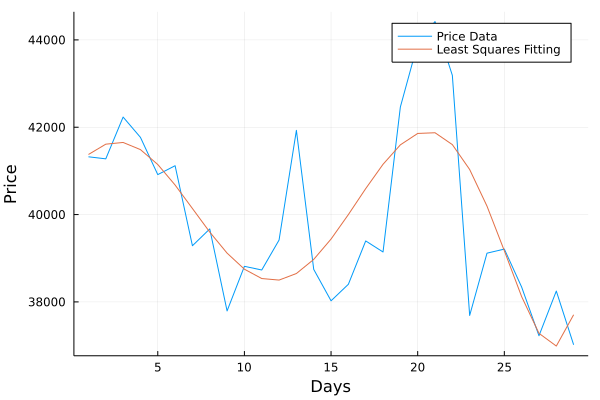

In [13]:
using Plots

xhat = copy(xhat3)

pred = A*xhat #pred = xhat[1]*A[:,1] + xhat[2]*A[:,2] + xhat[3]*A[:,3] + xhat[4]*A[:,4]+ xhat[5]*A[:,5]+ xhat[6]*A[:,6]+ xhat[7]*A[:,7]
print(pred)
plot(A[:,2],b,xlabel = "Days",ylabel = "Price",label = "Price Data")
plot!(A[:,2],pred, label="Least Squares Fitting")



To determine the future daily price a week ahead we use

[40027.57358858897, 44710.27108122641, 52688.942138891434, 65102.070919945836, 83315.26547820307, 108946.61894140672, 143893.31436927943]

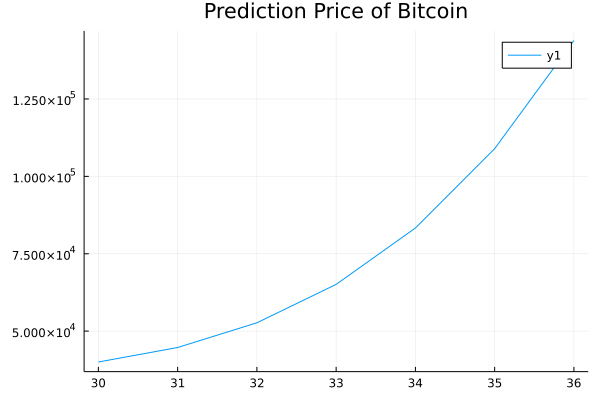

In [14]:
C = Array((N+1:36)); # Since day 30 to day 36 just a week later
C = [ones(7,1) C C.^2 C.^3 C.^4 C.^5 C.^6]; #matriz of those following 7 days
b2 = C*xhat
print(b2)
plot(C[:,2],b2, title="Prediction Price of Bitcoin")

Autor: Paola Gallegos Pinto, 1005257935, Universidad Nacional, Bogota Colombia, 2022 